# 浸水域に位置する避難所を解析する

## 実現すること

### ArcGIS で公開されている千葉県の避難所のポイントデータに対して標高のデータを付与し、浸水域にある避難所のデータを抽出する

## 使用データ

### ①数値標高モデルデータ
#### 基盤地図情報（国土地理院）サイトよりダウンロード

### ②[千葉市 避難場所・避難所・広域避難場所・津波避難ビル](http://data.esrij.com/datasets/%E5%8D%83%E8%91%89%E5%B8%82-%E9%81%BF%E9%9B%A3%E5%A0%B4%E6%89%80%E3%83%BB%E9%81%BF%E9%9B%A3%E6%89%80%E3%83%BB%E5%BA%83%E5%9F%9F%E9%81%BF%E9%9B%A3%E5%A0%B4%E6%89%80%E3%83%BB%E6%B4%A5%E6%B3%A2%E9%81%BF%E9%9B%A3%E3%83%93%E3%83%AB)

### ESRIジャパンオープンデータポータルより

# ArcPy および ArcGIS API for Python（Python API） で実現すること

### 1.千葉県千葉市の避難所のデータの呼び出し（Python API）
### 2. 数値標高モデルデータをラスターにする（ArcPy）
### 3. 避難所ポイントのデータに標高データを付与する（ArcPy）
### 4. サービスの作成と地図への出力（Python API）
### 5. 解析結果をグラフおよび標高値によるクラス分けをしてグラフで出す（Pandas）
 

### 下準備①:標高データの準備

![ビューワーからの準備](img/junbi.png)

### 下準備②:使用するPythonモジュールのインポート

In [83]:
import arcgis
from arcgis.gis import GIS
import os
import sys
import glob
import zipfile
import arcpy
from arcpy import env
from arcpy.sa import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from arcgis.features import FeatureLayer
arcpy.CheckOutExtension("Spatial")

'CheckedOut'

### 下準備③:ユーザー情報準備

Enter password: ········


<User username:WakanaSato>
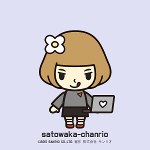

In [67]:
taegetPortal = "https://<yourportal>.arcgis.com/home/"
develoersUser = 'Username'
# AGOL準備
gis = GIS(taegetPortal,develoersUser,verify_cert=False)
user = gis.users.get(develoersUser)
user

## 1.千葉市 避難所のデータの呼び出し（Python API）

In [5]:
# Item Added From Toolbar
# Title: 千葉市 避難場所・避難所・広域避難場所・津波避難ビル | Type: Feature Service | Owner: ESRIJ_OpenData
agol_gis = GIS(set_active=False)
chiba_esc_item = agol_gis.content.get("60ef62a433ee4be0b21324c86793e5a8")
chiba_esc_item

<Item title:"千葉市 避難場所・避難所・広域避難場所・津波避難ビル" type:Feature Layer Collection owner:ESRIJ_OpenData>

In [6]:
# 中身の確認
chiba_esc_item.layers[0].query(as_df=True)

,OBJECTID,SHAPE,住所,方書,施設等の名称,種別,経度,緯度,避難所等の定義,郵便番号
0,1,"{""x"": 140.08801300000005, ""y"": 35.632606000000...",千葉県千葉市稲毛区稲丘町19-30,None,稲丘小学校,避難場所,140.088013,35.632606,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0033
1,2,"{""x"": 140.08267200000012, ""y"": 35.636148000000...",千葉県千葉市稲毛区稲毛1-10,None,稲毛公園,避難場所,140.082672,35.636148,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0034
2,3,"{""x"": 140.08339, ""y"": 35.636562000000026, ""spa...",千葉県千葉市稲毛区稲毛1-10-17,None,稲毛公民館,避難場所,140.083390,35.636562,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0034
3,4,"{""x"": 140.08210000000008, ""y"": 35.643927000000...",千葉県千葉市稲毛区稲毛町5-120,None,稲毛中学校,避難場所,140.082100,35.643927,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0035
4,5,"{""x"": 140.08292000000006, ""y"": 35.640620000000...",千葉県千葉市稲毛区稲毛町5-535,None,稲毛小学校,避難場所,140.082920,35.640620,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0035
5,6,"{""x"": 140.08692200000007, ""y"": 35.641515000000...",千葉県千葉市稲毛区稲毛東5-8,None,稲毛東公園,避難場所,140.086922,35.641515,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0031
6,7,"{""x"": 140.12553300000002, ""y"": 35.653170000000...",千葉県千葉市稲毛区園生町1385,None,草野小学校,避難場所,140.125533,35.653170,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0051
7,8,"{""x"": 140.12745300000006, ""y"": 35.652474000000...",千葉県千葉市稲毛区園生町1397,None,草野中学校,避難場所,140.127453,35.652474,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0051
8,9,"{""x"": 140.11979200000007, ""y"": 35.654072000000...",千葉県千葉市稲毛区園生町384-93,None,草野公民館,避難場所,140.119792,35.654072,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0051
9,10,"{""x"": 140.115721, ""y"": 35.64687100000003, ""spa...",千葉県千葉市稲毛区園生町446-1,None,あやめ台小学校,避難場所,140.115721,35.646871,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0051


## 2.数値標高モデルデータをラスターにする（ArcPy）

### 手順

#### シェープファイルをアップロードする(解凍する)
####  ArcPyによるツールの実行

![ポイント→ラスター](img/p2r.png)
https://pro.arcgis.com/ja/pro-app/tool-reference/conversion/point-to-raster.htm

### シェープファイルをアップロードする(解凍する)

In [7]:
# フォルダとファイルの準備

# ワークスペースを作成する
os.getcwd()
os.chdir('home')
os.mkdir('workspace')
os.chdir('workspace')
myworkspace=os.getcwd()
myworkspace

'/arcgis/home/workspace'

In [8]:
# シェープファイルの解凍：https://note.nkmk.me/python-zipfile/
with zipfile.ZipFile(myworkspace+'/chibademshp.zip') as existing_zip:
    existing_zip.extractall(myworkspace)

### ArcPyによるツールの実行

In [9]:
# パラメータ定義::outRasterは指定したディレクトリに出力する
env.workspace = myworkspace

# Set local variables
inFeatures ="\\chibademshp\\chibadem.shp"
valField = "dem"
outRaster = myworkspace + "\\chibademp2r"
assignmentType = "MAXIMUM"
priorityField = "dem"

In [10]:
# ポイント->ラスターツール実行
p2r_result = arcpy.PointToRaster_conversion(inFeatures, valField, outRaster,assignmentType, priorityField, 0.00037)
p2r_result

<Result '/arcgis/home/workspace/chibademp2r'>

## 3.避難所ポイントのデータに標高データを付与する（ArcPy）

### 千葉県千葉市の避難所データに対して標高データを付与する

![抽出値 → ポイント](img/Extract_Values_to_Points.png)
https://pro.arcgis.com/ja/pro-app/tool-reference/spatial-analyst/extract-values-to-points.htm

In [11]:
# フィーチャサービスから、標高値を付加するポイントデータを呼び出しする
baseURL= chiba_esc_item.layers[0].url + '/query'
where = '1=1'
query = "?where={}&returnGeometry=true&outFields=*&f=json".format(where)
fsURL = baseURL + query
pointfs = arcpy.FeatureSet()
pointfs.load(fsURL)
pointfs

<FeatureSet object at 0x7f92f6aaac50[0x7f93740e7e70]>

In [12]:
# 出力用のファイルジオデータベースの作成
env.workspace = myworkspace
out_name = "add_esc2dem.gdb"
# Execute CreateFileGDB
add_dem2esc_gdb = arcpy.CreateFileGDB_management(myworkspace, out_name)
add_dem2esc_gdb

<Result '/arcgis/home/workspace/add_esc2dem.gdb'>

In [13]:
# パラメータ定義(ディレクトリは作成しておく)
inPointFeatures = pointfs
inRaster = "chibademp2r"
outPointFeatures =str(add_dem2esc_gdb) + '/add_esc2dem_point'

In [14]:
# 実行
exreslit = ExtractValuesToPoints(pointfs, inRaster, outPointFeatures)
exreslit

<geoprocessing server result object at 0x7f93377a3170>

In [15]:
# zipにする(PythonAPI でサービスにするために)
compFile = zipfile.ZipFile('./add_esc2dem_point.zip', 'w', zipfile.ZIP_STORED)

files = glob.glob('./add_esc2dem.gdb/*')
for file in files:
    compFile.write(file)
    
compFile.close()

## 4.サービスの作成と地図への出力（Python API）

In [16]:
add_dem2esc_point_item = gis.content.add({ 'type': 'File Geodatabase'},data=compFile.filename)
add_dem2esc_point_item

<Item title:"add_esc2dem_point" type:File Geodatabase owner:wakanasato>

In [17]:
add_escapedem_Service = add_dem2esc_point_item.publish()
add_escapedem_Service

<Item title:"add_esc2dem_point" type:Feature Layer Collection owner:wakanasato>

### 地図で表示する

In [90]:
chiba_map = agol_gis.map('千葉市中央区',zoomlevel=14)
chiba_map

MapView(layout=Layout(height='400px', width='100%'), zoom=14.0)

In [91]:
# Item Added From Toolbar
# Title: 千葉県千葉市標高レイヤー | Type: Feature Service | Owner: WakanaSato
agol_gis = GIS(set_active=False)
chibadem_item = agol_gis.content.get("d125cd1ea19249c895718ee058ff6f18")
chiba_map.add_layer(chibadem_item)

In [92]:
layeritem = FeatureLayer(add_escapedem_Service.url + '/0')
chiba_map.add_layer(layeritem)

## 5.解析結果をグラフおよび標高値によるクラス分けをしてグラフで出す（Pandas）

In [75]:
analysiseddata = add_escapedem_Service.layers[0].query(as_df=True)
analysiseddata

,SHAPE,objectid,rastervalu,住所,方書,施設等の名称,種別,経度,緯度,避難所等の定義,郵便番号
0,"{""x"": 15594526.273401514, ""y"": 4250185.5720440...",1,NaN,千葉県千葉市稲毛区稲丘町19-30,None,稲丘小学校,避難場所,140.088013,35.632606,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0033
1,"{""x"": 15596942.796907641, ""y"": 4249100.6033406...",2,19.850000,千葉県千葉市稲毛区轟町1-12-3,None,轟公民館,避難場所,140.109721,35.624684,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0021
2,"{""x"": 15597103.096974388, ""y"": 4249249.0577433...",3,NaN,千葉県千葉市稲毛区轟町1-18-52,None,県立千葉東高等学校,避難場所,140.111161,35.625768,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0021
3,"{""x"": 15596785.613786645, ""y"": 4249870.5612180...",4,NaN,千葉県千葉市稲毛区轟町3-4-30,None,轟町小学校,避難場所,140.108309,35.630306,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0021
4,"{""x"": 15596758.340511419, ""y"": 4249989.7164212...",5,NaN,千葉県千葉市稲毛区轟町3-5-14,None,轟町中学校,避難場所,140.108064,35.631176,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0021
5,"{""x"": 15596905.170919754, ""y"": 4250034.9135616...",6,NaN,千葉県千葉市稲毛区轟町3-6-25,None,市立第二養護学校,避難場所,140.109383,35.631506,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0021
6,"{""x"": 15595191.296039507, ""y"": 4249340.9525750...",7,NaN,千葉県千葉市稲毛区黒砂2-4-18,None,黒砂公民館,避難場所,140.093987,35.626439,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0042
7,"{""x"": 15595628.113721378, ""y"": 4249895.0769527...",8,NaN,千葉県千葉市稲毛区黒砂台3-1,None,西千葉公園,避難場所,140.097911,35.630485,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0041
8,"{""x"": 15597830.681166202, ""y"": 4249210.1635908...",9,19.559999,千葉県千葉市稲毛区作草部2-8-53,None,都賀公民館,避難場所,140.117697,35.625484,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0015
9,"{""x"": 15598419.672592007, ""y"": 4250057.2382786...",10,8.990000,千葉県千葉市稲毛区作草部町1298-1,None,千草台東小学校,避難場所,140.122988,35.631669,災害が発生して一時的な避難が必要なときに、身の安全を確保する場所,263-0014


In [29]:
rastervalu = analysiseddata[analysiseddata['rastervalu'] > 1]
rastervalu['rastervalu']

1      19.850000
8      19.559999
9       8.990000
10      8.910000
11     19.900000
13     17.330000
14     17.870001
15     25.480000
17     26.250000
18     29.240000
19     30.719999
22     30.850000
23     29.100000
24     27.770000
35     28.209999
38     19.610001
41      2.430000
42      2.000000
43     30.280001
44     19.059999
45     20.549999
46     20.100000
47      2.980000
48      6.640000
49      5.670000
50     10.610000
51      3.980000
52      3.900000
53      2.860000
54     18.330000
         ...    
232     3.360000
233     3.570000
234    22.430000
235    27.580000
245     6.590000
249    18.400000
250    14.200000
251     3.520000
252    25.200001
253     4.470000
254    27.840000
256    27.770000
258    18.830000
263     3.390000
264     3.590000
265     5.900000
266     2.860000
267    13.090000
268     2.430000
269     5.200000
271     3.360000
272     3.440000
273     3.810000
274     3.600000
276     3.540000
277     3.420000
278     2.000000
279     2.3100

In [30]:
cutedpd = pd.cut(rastervalu['rastervalu'], bins=[0,1,5,10,15,20,50]).value_counts()
cutedpd.index = ["1m=<5m","20m=<50m","15m=<20m","5m=<10m","10m=<15m","<1m"]
cutedpd

1m=<5m      77
20m=<50m    54
15m=<20m    31
5m=<10m     22
10m=<15m    16
<1m          0
Name: rastervalu, dtype: int64

Text(0.5, 1.0, 'rastervalu')

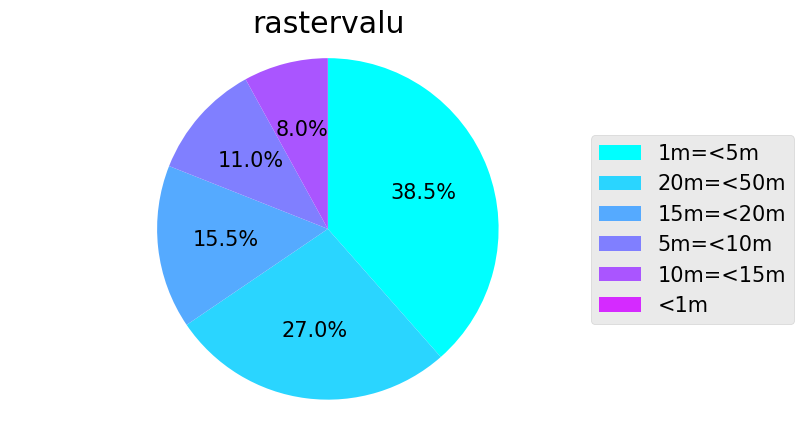

In [32]:
#データ
data=cutedpd.values
label=cutedpd.index

#綺麗に書くため定義
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

#各種パラメータ
size=(9,5)
col=cm.cool(np.arange(len(data))/float(len(data)))

#円グラフ
plt.figure(figsize=size,dpi=100)
plt.pie(data,colors=col,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.title('rastervalu')
